# MRMR: multiresolution multi-robot comparison graphs

Code for the comparative analysis of experiments for this paper. It is assumed that the experiments had been run with nRobot1Day-Run. 

This code runs on an experiment under the type nrobot1day which specifies multiple subexperiments which has a prefix comp_xxx. The sub-experiments are listed in that exp/run file. 

The assumption is that those experiments had been already run and their results had been stored in the results.pickle files in the corresponding data dirs. 

This code follows the pattern of the one from 1Robot1Day-Compare



In [1]:
import sys
sys.path.append("..")
from settings import Config
import pathlib
from pprint import pprint
import gzip as compress
import copy
import pickle
import matplotlib.pyplot as plt
import numpy as np

from information_model import StoredObservationIM


In [2]:
experiment = "nrobot1day"

# the lead run is the one that will provide the test data.
# also the directory of this run is where the graphs will be saved.

# leadrun = "comp_all"
leadrun = "comp-mrmr"

# now load them

leadexp = Config().get_experiment(experiment, leadrun)

runs = leadexp["tocompare"]

exps = []
allresults = [ ]
for run in runs:
    exp = Config().get_experiment(experiment, run)
    exps.append(exp)
    resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
    if not resultsfile.exists():
        print(f"Results file does not exist:\n{resultsfile}")
        print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
        raise Exception("Nothing to do.")
    with compress.open(resultsfile, "rb") as f:
        results = pickle.load(f)
    allresults.append(results)

Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\comp-mrmr_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: nrobot1day/comp-mrmr successfully loaded
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\mrmr-3random_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: nrobot1day/mrmr-3random successfully loaded
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\mrmr-3lawnmowers_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: nrobot1day/mrmr

In [3]:
def count_detections(results, robotno, field = "TYLCV"):
    """Returns the number of detections for the specified robot, adapted from wbf_figures.show_detections"""
    obs = np.array(results["observations"])[:, robotno]
    detections = [[a[StoredObservationIM.X], a[StoredObservationIM.Y]] for a in obs if a[field][StoredObservationIM.VALUE] == 0.0]
    return len(detections)

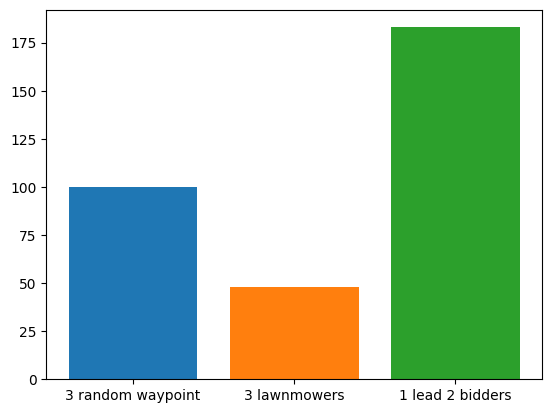

In [5]:
fig, ax = plt.subplots(1,1)
for exp, results in zip(exps, allresults):
    total = 0
    for i, robot in enumerate(results["robots"]):
        detections = count_detections(results, i)
        total += detections
    ax.bar(exp["name"], total)
plt.savefig(pathlib.Path(leadexp["data_dir"], "detections-compare-bar.pdf"))